### Table of Contents

* [Step 1: Gathering Data](#chapter1)
    * [ 1.1. Getting required libaries](#section_1_1)
    * [1.2. Gathering all three pieces of data](#section_1_2)
        * [1.2.1. The tweet image predictions](#section_1_2_1)
        * [1.2.2. The WeRateDogs Twitter archive](#section_1_2_2)
        * [1.2.3. Additional data from the Twitter API](#section_1_2_3)
* [Step 2: Assessing Data](#chapter2)
    * [2.1. Visual assessment](#section_2_1)
    * [2.2. Programmatic assessment](#section_2_2)
    
* [Step 3: Cleaning Data](#chapter3)
    * [3.1. Cleanning WeRateDogs Twitter archive dataset](#section_3_1)
    * [3.2. Cleanning Image prediction dataset](#section_3_2)
    * [3.3. Cleanning tweeter_data dataset](#section_3_3)
   
* [Step 4: Storing  data](#chapter4)
    * [4.1 Combinning All datasets](#section_4_1)
    * [4.2. Storing data](#section_4_2)
    
* [Step 5: Analyzing and Visualizing Data](#chapter5)

## Step 1: Gathering Data  <a class="anchor" id="chapter1"></a>



### 1.1 Getting required libaries <a class="anchor" id="section_1_1"></a>

In [1]:
# importing requests library
import requests 

# importing numpy libarary
import numpy as np

#importing pandas library
import pandas as pd

#importing matplotlib libarary
import matplotlib.pyplot as plt

# importing tweepy libary
import tweepy

# importing 0authHandler 
from tweepy import OAuthHandler

# importing json librariry 
import json

#importing timeit library
from timeit import default_timer as timer

# importing functools libarary
from functools import reduce

#importing image library
from PIL import Image
# importing IO
from io import BytesIO


### 1.2. Gathering all three pieces of data <a class="anchor" id="section_1_2"></a>

#### 1.2.1. The tweet image predictions <a class="anchor" id="section_1_2_1"></a>

In [2]:
# getting data from url
df1= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# openning the data
with open('image-predictions.tsv',mode='wb') as file:
    file.write(df1.content)
    
# reading the data
image_data=pd.read_csv('image-predictions.tsv',sep='\t')
image_data

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]


#### 1.2.2. The WeRateDogs Twitter archive <a class="anchor" id="section_1_2_2"></a>

In [3]:
# reading the data using pandas
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

# displaying top 5 rows
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None


#### 1.2.3. Additional data from the Twitter API <a class="anchor" id="section_1_2_3"></a>

In [4]:
# innitialiazing empty list of data
data = []
# reading the file
with open('tweet_json.txt') as f:
    for line in f:
        #convering string file to dictionary
        data.append(json.loads(line))


In [5]:
# Initializing a dictionary of id , retweet_count, favorite_count
df_dict=[]
for dictionary in data:
    # extracting id in data
    dict_id= dictionary['id']
    #extracting retweet_count
    retweet_count=dictionary['retweet_count']
    # extracting favorite_count
    favorite_count=dictionary['favorite_count']
    # appending extracted data into their dictionary
    df_dict.append({'Tweet ID': dict_id,
                        'Retweet Count': retweet_count,
                        'Favorite Count': favorite_count})
#converting the dictioanry into dataframe      
tweeter_data = pd.DataFrame(df_dict) 


In [6]:
#Displaying first 5 rows
tweeter_data.head()

Tweet ID  Retweet Count  Favorite Count
0  892420643555336193           7023           33858
1  892177421306343426           5304           29360
2  891815181378084864           3487           22074
3  891689557279858688           7235           36981
4  891327558926688256           7774           35356


## Step 2: Assessing Data <a class="anchor" id="chapter2"></a>

### QUALITY ISSUES


### 2.1. Visual assessment <a class="anchor" id="section_2_1"></a>


There are missing values in The WeRateDogs Twitter archive.
In Excel , the text column , some text are hidden in one cell while others occupy several cells.
Character mixing in p1 ,	p1_conf,p2 	p2_conf columns in image dataset where some names start with capital letters, others not, under score charactrs, etc.
In the dog category columns(doggo 	floofer 	pupper 	puppo) have 'None' values instead of NaN in Twitter archive dataset.


### 2.2. Programmatic assessment <a class="anchor" id="section_2_2"></a>

In [7]:
# displaying dataset informations 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# displaying dataset informations
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
#displaying dataset information
tweeter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Tweet ID        2027 non-null   int64
 1   Retweet Count   2027 non-null   int64
 2   Favorite Count  2027 non-null   int64
dtypes: int64(3)
memory usage: 47.6 KB


In [10]:
# statistical details
tweeter_data.describe()

Tweet ID  Retweet Count  Favorite Count
count  2.027000e+03    2027.000000     2027.000000
mean   7.470648e+17    2580.560434     7470.807104
std    6.951384e+16    4346.017185    11442.812872
min    6.660209e+17       1.000000        0.000000
25%    6.838513e+17     531.500000     1281.500000
50%    7.280353e+17    1229.000000     3229.000000
75%    8.089615e+17    2964.000000     9291.000000
max    8.924206e+17   70870.000000   145080.000000

In [11]:
# statistical details
image_data.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [12]:
# statistical details
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [13]:
# uniques value counts in df
tweeter_data.nunique()

Tweet ID          2027
Retweet Count     1512
Favorite Count    1743
dtype: int64

In [14]:
# uniques value counts in df
image_data.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [15]:
# uniques value counts in df
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [16]:
# checking for duplicate
sum(tweeter_data.duplicated())

0

In [17]:
# checking for duplicate
sum(image_data['jpg_url'].duplicated())

66

In [18]:
# checking for duplicate
sum(twitter_archive.duplicated())

0

In [19]:
#checking the NaN values
tweeter_data.isnull().sum()

Tweet ID          0
Retweet Count     0
Favorite Count    0
dtype: int64

In [20]:
#checking the NaN values
image_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
#checking the NaN values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

##### Overall quality  issues  
1. There are missing values in The WeRateDogs Twitter archive
2. In Excel , the text column , some text are hidden in one cell while others occupy several cells
3. Character mixing in p1 ,	p1_conf,p2 	p2_conf columns in image dataset where some names start with capital letters others not, under score charactrs, etc
4. In the dog category columns(doggo 	floofer 	pupper 	puppo) have 'None' values instead of NaN in Twitter archive dataset.

5. Timestamp is not in datetime but it is the object
6. IDs in twitter_archive dataset are numbers which can be operated but they must be strings.
7. Tweet_id in image_data dataset is an integer which can be operated but must be a string.
8.  There are Duplicates in image url column in image datasets
9. There are Invalid names in Name columns such as a , quite,the, an , not ,etc.
10.  Some dogs have no names
11. Some dog ratings do not follow general rules
12. Mixed data format in dog ratings.



### TIDYNESS ISSUES

1. All dataset should be merged since they are all refering to about one thing for easy computation.
2. The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.



## Step 3: Cleaning Data  <a class="anchor" id="chapter3"></a>

In [22]:
twitter_archive_cleaned = twitter_archive.copy()
image_data_clean = image_data.copy()
tweeter_data_clean = tweeter_data.copy()

### 3.1. Cleanning WeRateDogs Twitter archive dataset <a class="anchor" id="section_3_1"></a>

In [23]:
twitter_archive_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Removing all rows that have values in retweeted_status_id retweeted_status_user_id,etweeted_status_timestamp columns

In [24]:
'''
CODE
'''
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id.isnull()]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_user_id.isnull()]
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_timestamp.isnull()]
"""
TEST
"""
twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id.notnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

##### Dropping columns with 85 % or more of Missing Values in their content

In [25]:
"""
CODE
"""
perctange =85
min_count =  int(((100-perctange)/100)*twitter_archive_cleaned.shape[0] + 1)
twitter_archive_cleaned = twitter_archive_cleaned.dropna( axis=1, thresh=min_count)

"""
TEST

"""
twitter_archive_cleaned.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         58
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

##### drop rows where we have nan in expanded_urls column


In [26]:
"""
CODE
"""
twitter_archive_cleaned.dropna(inplace=True)

"""
TEST
"""
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


##### Converting IDs into string and timestamp into date time

In [27]:

"""
CODE

"""
# Converting IDs into string
twitter_archive_cleaned['tweet_id']=twitter_archive_cleaned['tweet_id'].astype('object')
# timestamp into datetime
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])
'''
TEST
'''

twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

##### Replacing Invalid names with Nan: that is names starting with lower cases

In [28]:
[i for i in twitter_archive_cleaned['name'] if i.islower()][1:20]

['a',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very']

In [29]:
"""
CODE

"""

# dropping the colun with the mentioned invalid names

twitter_archive_cleaned.loc[twitter_archive_cleaned.name.str.islower(),'name'] = None
twitter_archive_cleaned.name.replace(regex=r'None', value= np.nan, inplace = True)

"""
TEST
"""
    
# checking for invalid name
twitter_archive_cleaned.name.value_counts()


Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny       9
           ..
Goliath     1
Brandi      1
Eugene      1
Shadoe      1
Barclay     1
Name: name, Length: 930, dtype: int64

##### Deleting denominators which are not 10

In [30]:
"""
CODE

"""

# getting a list of indexes corresponding to wrong denominatory
invalid_denominator= list(twitter_archive_cleaned.query("rating_denominator != 10").index)

# dropping wrong denominators index
twitter_archive_cleaned.drop(index=invalid_denominator, inplace=True)
"""
TEST
"""

# cheching if 10 is only the remaining denominator
twitter_archive_cleaned['rating_denominator'].unique()

array([10], dtype=int64)

###### Converting Dog category columns into one column

In [31]:

# Joinning columns
twitter_archive_cleaned['Dog Category'] = twitter_archive_cleaned[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ', '.join(x), axis=1)
# Deleting original columns
twitter_archive_cleaned.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

# Adding empty string
twitter_archive_cleaned = twitter_archive_cleaned.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')
# replacing empty string With No category
twitter_archive_cleaned = twitter_archive_cleaned.replace(regex=r'', value=np.nan)



In [32]:
# checking the categories
twitter_archive_cleaned['Dog Category'].value_counts()

pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: Dog Category, dtype: int64


### 3.2. Cleanning Image prediction dataset <a class="anchor" id="section_3_2"></a>

##### Converting ID into object

In [33]:
"""
CODE
"""

image_data_clean['tweet_id']=image_data_clean['tweet_id'].astype('object')

"""
TEST
"""
image_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Drop each false row prediction: Not dog predictions

In [34]:

"""
CODE
"""

# getting indexes with wrong prediction
indexes_with_false_prdiction = list(image_data_clean[~((image_data_clean.p1_dog) | (image_data_clean.p2_dog) | (image_data_clean.p3_dog))].index)
# dropping indexes with wrong prediction
image_data_clean.drop(indexes_with_false_prdiction, inplace = True)
# resetting index
image_data_clean=image_data_clean.reset_index(drop = True)


"""
TEST
"""

image_data_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

##### Repalcing '-' with space

In [35]:

"""
CODE
"""
image_data_clean['p1'] = image_data_clean['p1'].replace(
    regex=r'(_)', value=' ').str.title()

image_data_clean['p2'] = image_data_clean['p2'].replace(
    regex=r'(_)', value=' ').str.title()

image_data_clean['p3'] = image_data_clean['p3'].replace(
    regex=r'(_)', value=' ').str.title()

"""
TEST
"""

image_data_clean[['p1','p2','p3']].head()

p1                  p2                   p3
0  Welsh Springer Spaniel              Collie    Shetland Sheepdog
1                 Redbone  Miniature Pinscher  Rhodesian Ridgeback
2         German Shepherd            Malinois           Bloodhound
3     Rhodesian Ridgeback             Redbone   Miniature Pinscher
4      Miniature Pinscher          Rottweiler             Doberman

##### deleting duplicate rows in Image url

In [36]:

"""
CODE
"""
image_data_clean.drop_duplicates(subset='jpg_url', keep='first',inplace=True)


"""
TEST
"""
sum(image_data_clean['jpg_url'].duplicated())

0


### 3.3. Cleanning tweeter_data dataset <a class="anchor" id="section_3_3"></a>

#### renaming twitter Id to match the name in other dataset

In [37]:

"""
CODE
"""
tweeter_data_clean.rename(columns={'Tweet ID': "tweet_id"}, inplace = True)

"""
TEST
"""

tweeter_data_clean

tweet_id  Retweet Count  Favorite Count
0     892420643555336193           7023           33858
1     892177421306343426           5304           29360
2     891815181378084864           3487           22074
3     891689557279858688           7235           36981
4     891327558926688256           7774           35356
...                  ...            ...             ...
2022  666049248165822465             37              89
2023  666044226329800704            115             247
2024  666033412701032449             36             100
2025  666029285002620928             39             112
2026  666020888022790149            423            2293

[2027 rows x 3 columns]


## Step 4: Storing  data <a class="anchor" id="chapter4"></a>



### 4.1 Combinning All datasets <a class="anchor" id="section_4_1"></a>


In [38]:
all_datasets = [twitter_archive_cleaned, image_data_clean, tweeter_data_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how='inner'), all_datasets)

In [39]:
twitter_archive_master.head()

tweet_id                 timestamp  \
0  892177421306343426 2017-08-01 00:17:27+00:00   
1  891815181378084864 2017-07-31 00:18:03+00:00   
2  891689557279858688 2017-07-30 15:58:51+00:00   
3  891327558926688256 2017-07-29 16:00:24+00:00   
4  891087950875897856 2017-07-29 00:08:17+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Darla. She commenced a snooze mid meal...   
3  This is Franklin. He would like you to stop ca...   
4  Here we have a majestic great white breaching ...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891689557...                13   
3  https://twitter.com/dog_rates/status/891327558...                12   
4  https://twitter.com/dog_rates/status/891087950...                13   

   rating_denominator      name Dog Category  \
0                  10     Tilly          NaN   
1                  10    Archie          NaN   
2                  10     Darla          NaN   
3                  10  Franklin          NaN   
4                  10       NaN          NaN   

                                           jpg_url  ...   p1_conf p1_dog  \
0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  ...  0.323581   True   
1  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  ...  0.716012   True   
2  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  ...  0.170278  False   
3  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  ...  0.555712   True   
4  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg  ...  0.425595   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0            Pekinese  0.090647   True                     Papillon  0.068957   
1            Malamute  0.078253   True                       Kelpie  0.031379   
2  Labrador Retriever  0.168086   True                      Spatula  0.040836   
3    English Springer  0.225770   True  German Short-Haired Pointer  0.175219   
4       Irish Terrier  0.116317   True              Indian Elephant  0.076902   

  p3_dog  Retweet Count  Favorite Count  
0   True           5304           29360  
1   True           3487           22074  
2  False           7235           36981  
3   True           7774           35356  
4  False           2603           17832  

[5 rows x 22 columns]



### 4.2. Storing data <a class="anchor" id="section_4_2"></a>


In [40]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)


## Step 5: Analyzing and Visualizing Data  <a class="anchor" id="chapter5"></a>

**1. Getting top 10 most names in the dataset**

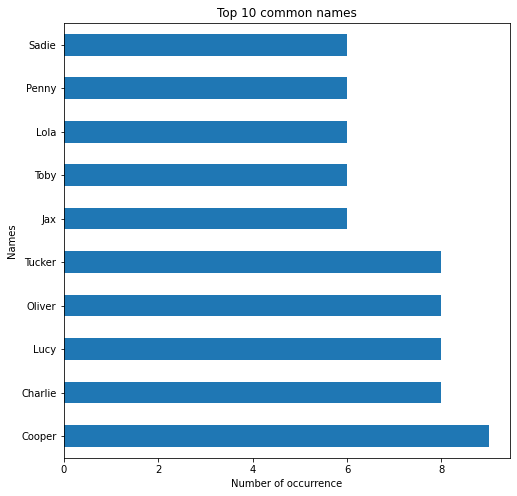

In [41]:
plt.figure(figsize=(8,8))
twitter_archive_master.name.value_counts().head(10).plot(kind='barh')
plt.title('Top 10 common names')
plt.ylabel('Names')
plt.xlabel('Number of occurrence')
plt.show()

**2. Top 10 Retweeted tweed_id of dogs**

In [42]:
most_retweeted= (twitter_archive_master.sort_values(by=['Retweet Count'],ascending=False)).head(10)[['Retweet Count','tweet_id','jpg_url','Dog Category']]
most_retweeted.set_index('tweet_id',inplace=True)

In [43]:
dog_photos=[]
for i in most_retweeted['jpg_url']:
    response = requests.get(i)
    dog_photo = Image.open(BytesIO(response.content))
    dog_photos.append(dog_photo)
    


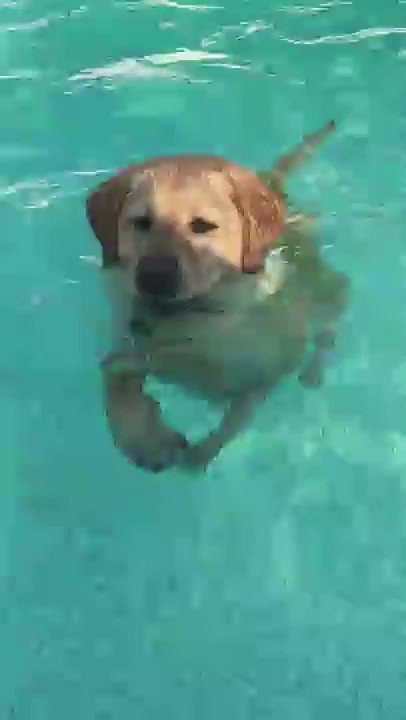

In [44]:
dog_photos[0]

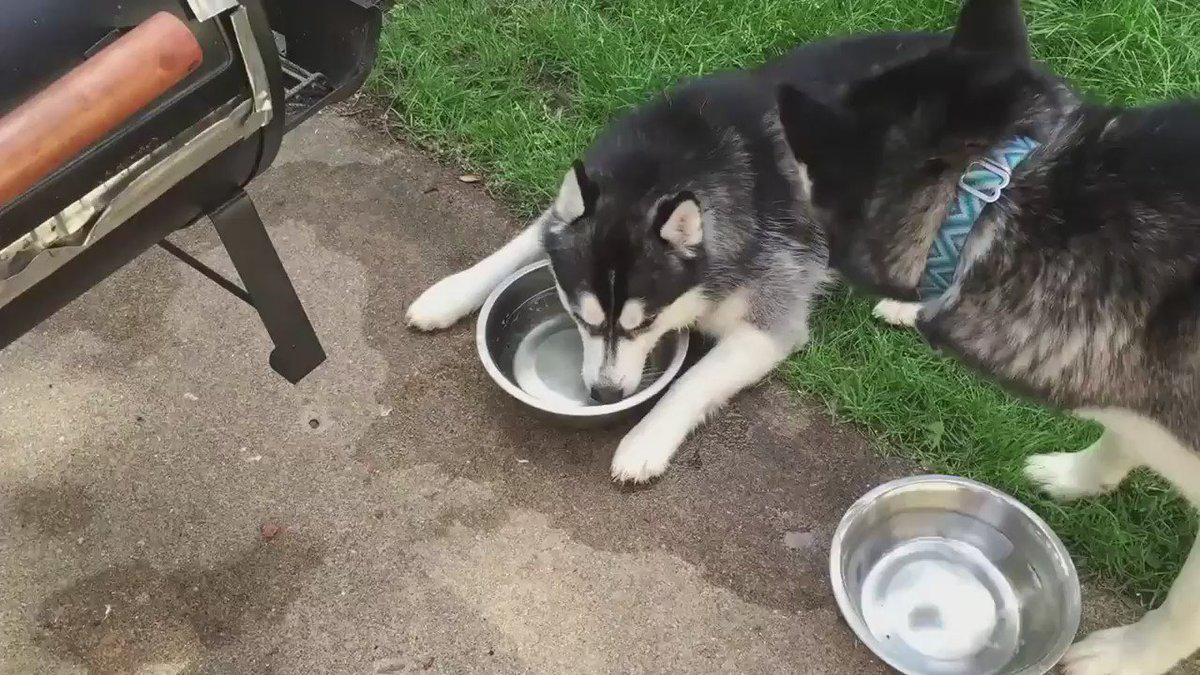

In [45]:
dog_photos[1]

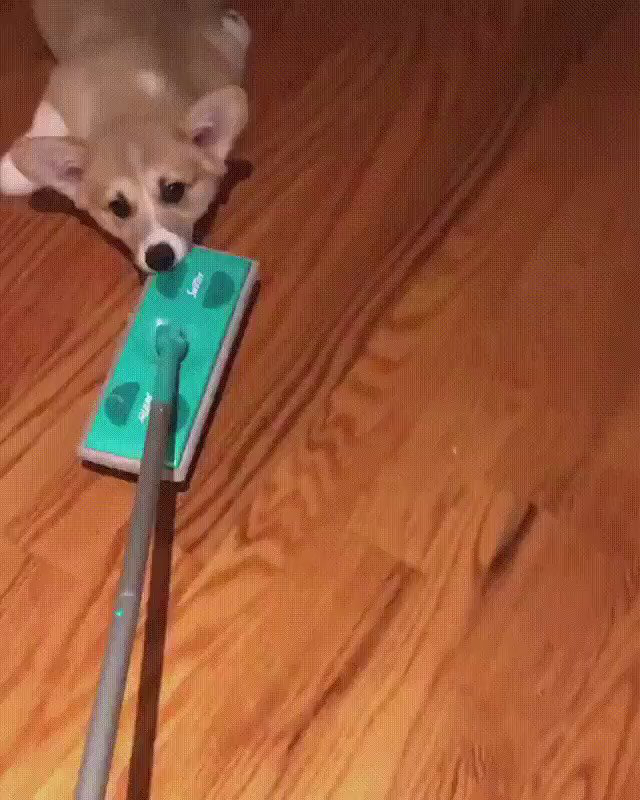

In [46]:
dog_photos[2]

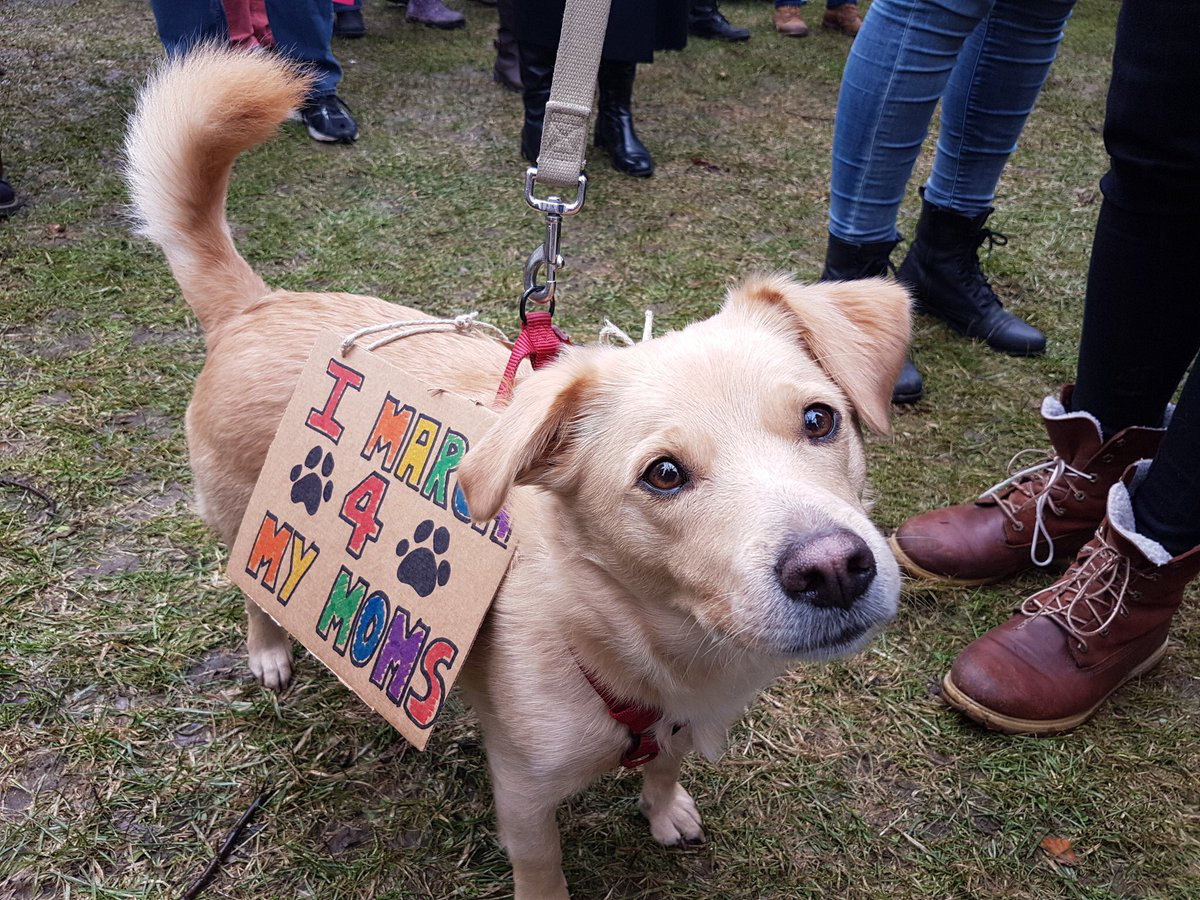

In [47]:
dog_photos[3]

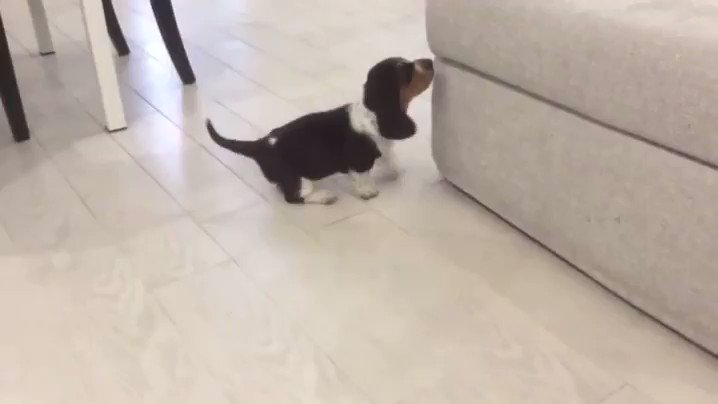

In [48]:
dog_photos[4]

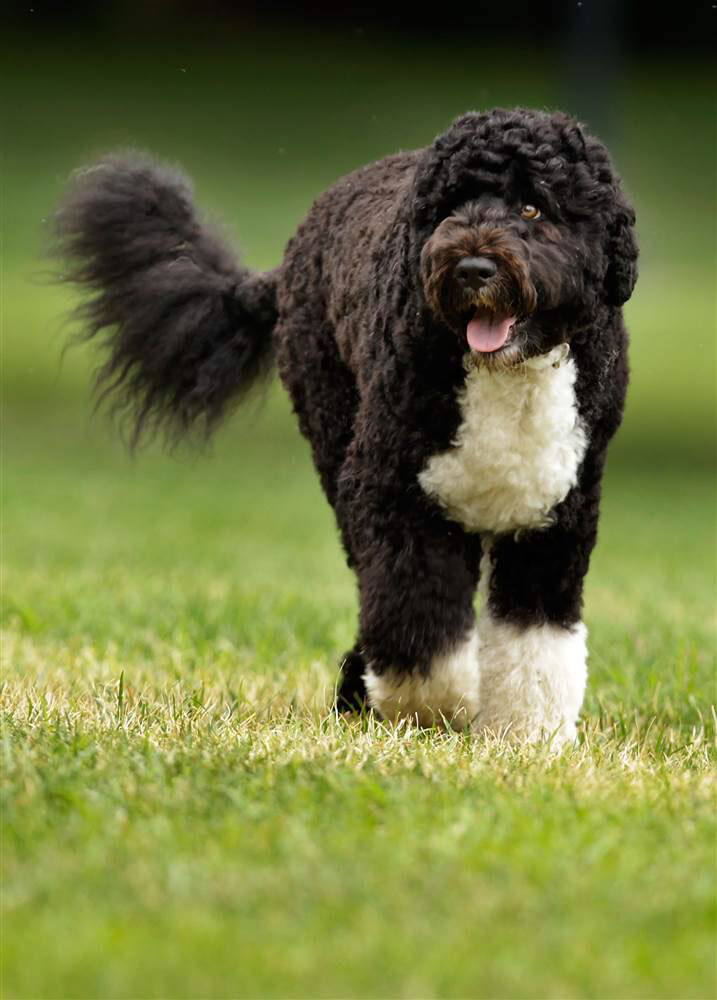

In [49]:
dog_photos[5]

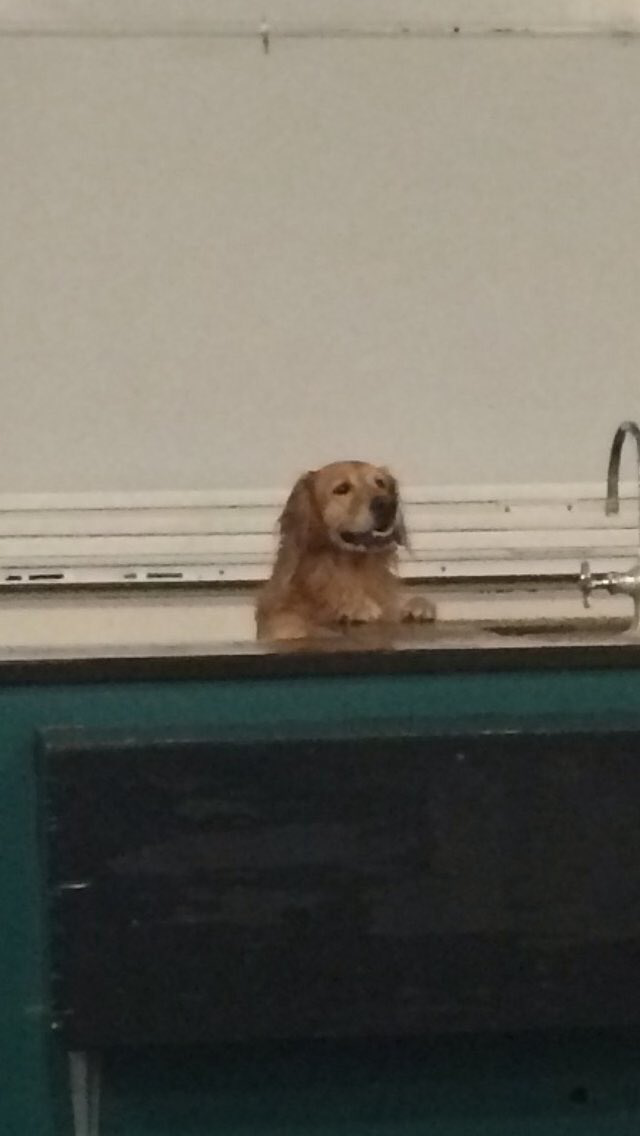

In [50]:
dog_photos[6]

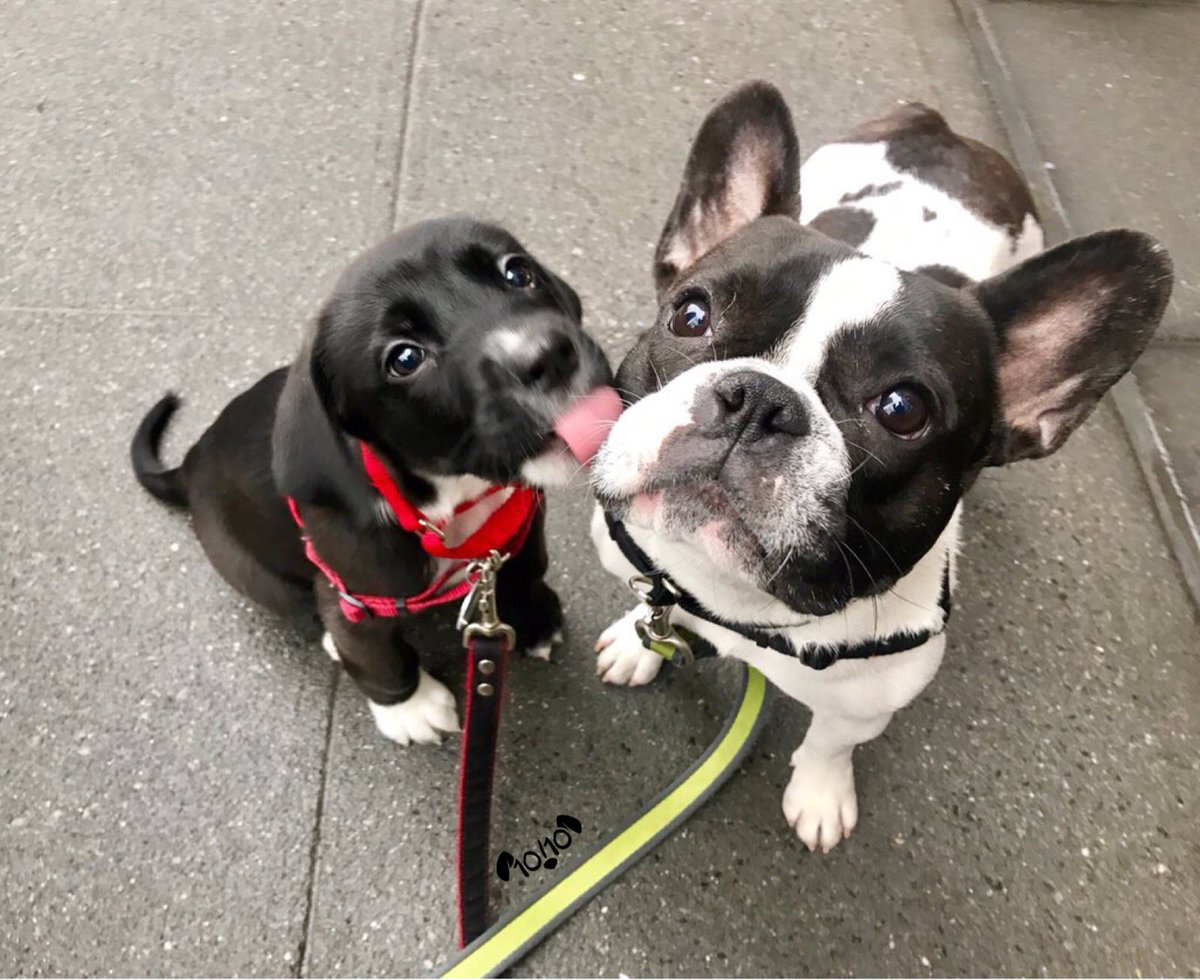

In [51]:
dog_photos[7]

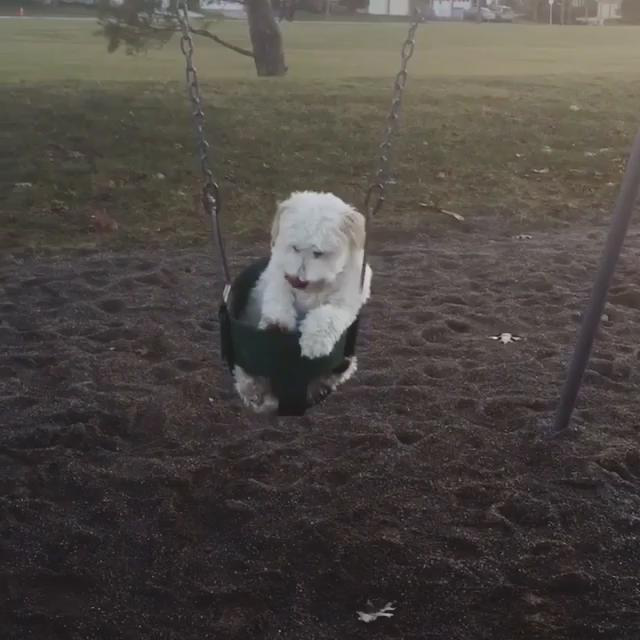

In [52]:
dog_photos[8]

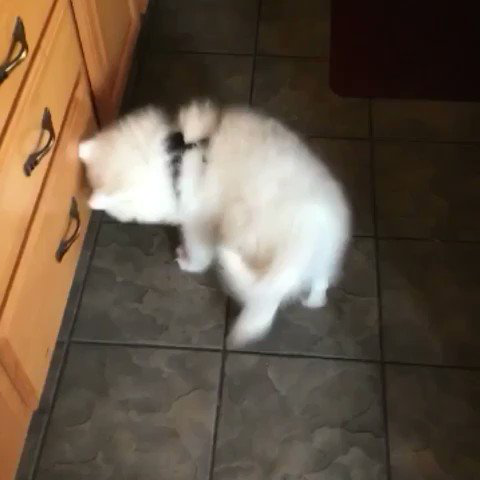

In [53]:
dog_photos[9]

##### Histogram of most retweeted IDs

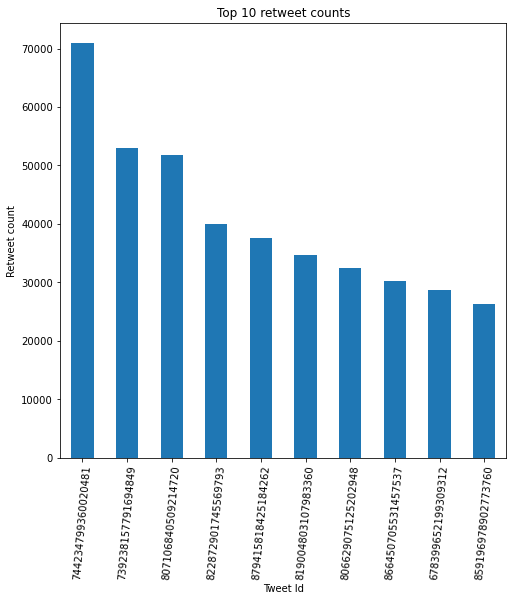

In [54]:
plt.figure(figsize=(8,8))
most_retweeted['Retweet Count'].plot(kind='bar')
plt.title('Top 10 retweet counts')
plt.ylabel('Retweet count')
plt.xlabel('Tweet Id')
plt.xticks(rotation=85);

##### Histogram of most Dog Category

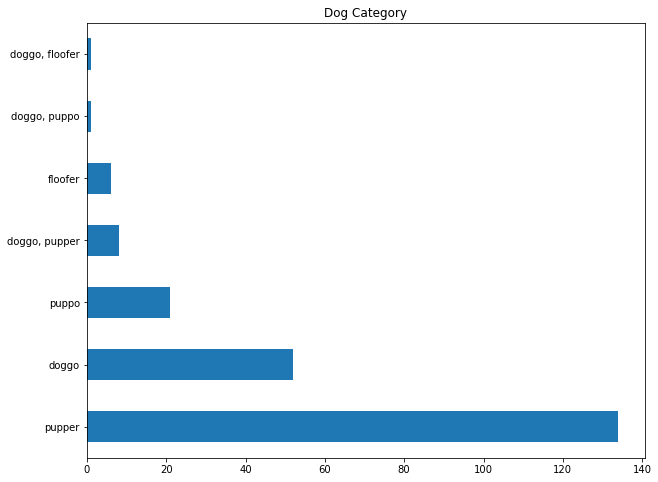

In [55]:
plt.figure(figsize=(10,8))
twitter_archive_master['Dog Category'].value_counts().plot(kind='barh')
plt.title('Dog Category')
plt.show()

#### Ratings distribution 

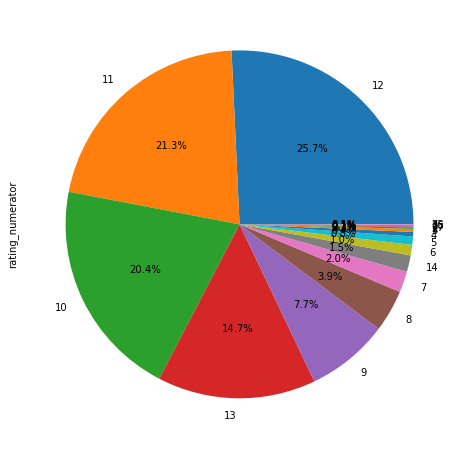

In [61]:

plt.figure(figsize=(8,8))

twitter_archive_master.rating_numerator.value_counts().plot(kind='pie',autopct='%1.1f%%');

#### Relationship between Favorite Count and Retweet Count

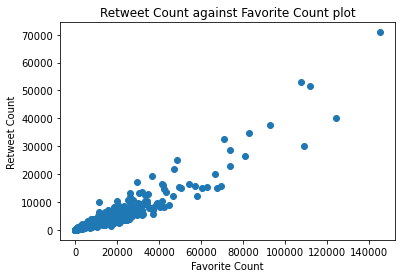

In [56]:
plt.scatter(twitter_archive_master['Favorite Count'],twitter_archive_master['Retweet Count'])
plt.ylabel('Retweet Count')
plt.xlabel('Favorite Count')
plt.title('Retweet Count against Favorite Count plot');

#### correlation between Favorite Count and Retweet Count

In [57]:
correlation =np.corrcoef(twitter_archive_master['Retweet Count'],twitter_archive_master['Favorite Count'])[0][1]
print(f'Correlation between Retweet Count and Favorite Count is {correlation}' )

Correlation between Retweet Count and Favorite Count is 0.9301346585105604
